<a href="https://colab.research.google.com/github/Taneyquezada/Estadistica/blob/main/eii_u2_ep_22150442.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#a) Deshazte de los valores nulos usando df.dropna(inplace = True). Realiza el proceso de encoding.

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Taneyquezada/Estadistica/refs/heads/main/Hipertension_Arterial_Mexico.csv")
df.dropna(inplace=True)

df.drop(columns = ['FOLIO_I'], inplace = True)

df

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,0.0,107,4,32.889389,120,1
1,2,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2,2,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0
3,1,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,64.70,154.0,48.5,33.5,0.0,117,5,26.265339,275,1
4,2,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2,62,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.25,160.5,51.1,34.5,77.8,125,4,1.000000,280,0
4359,1,39,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,0.0,130,4,19.193721,780,0
4360,2,69,15.9,11,2.9,1.9,21,44.0,74,0.34,...,71.20,148.6,47.2,38.0,0.0,147,4,1.000000,300,0
4361,1,67,17.6,14,5.5,4.0,44,96.0,171,0.80,...,68.20,167.7,51.5,36.5,96.4,108,2,1.000000,240,0


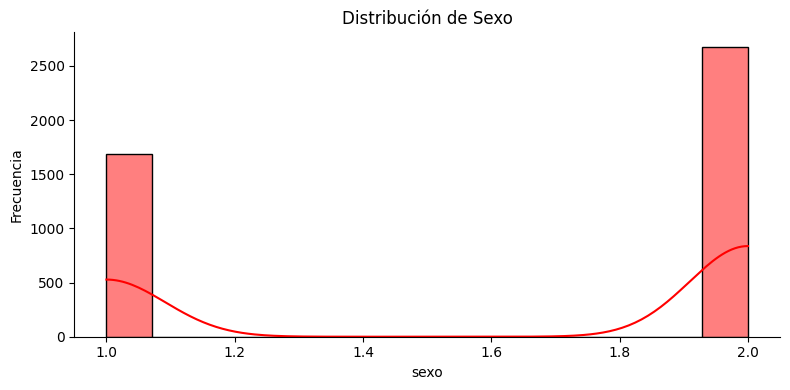

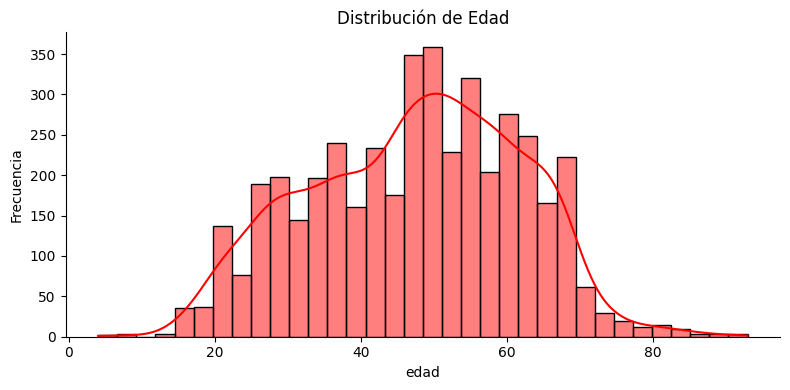

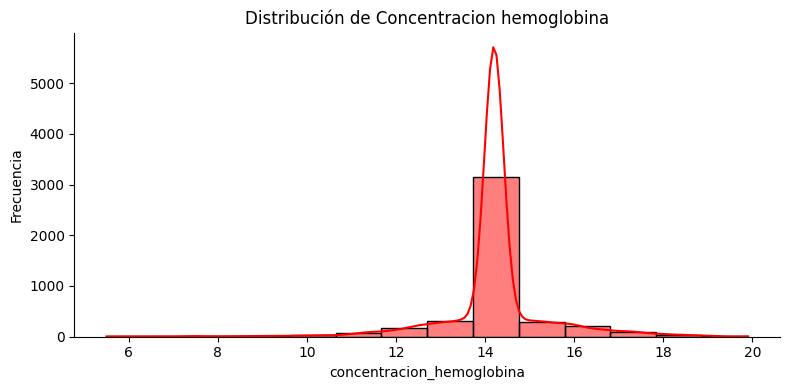

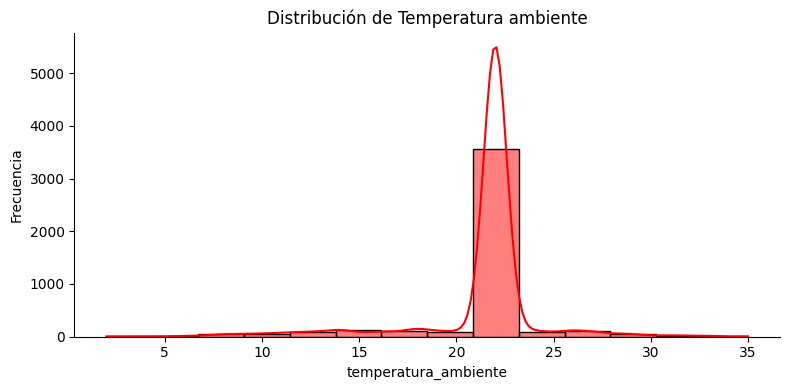

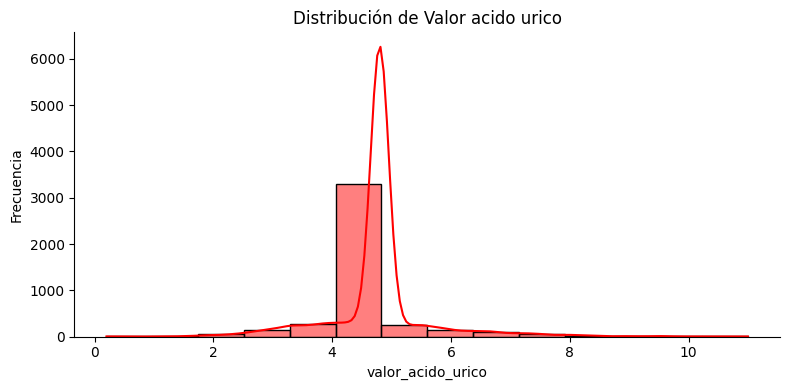

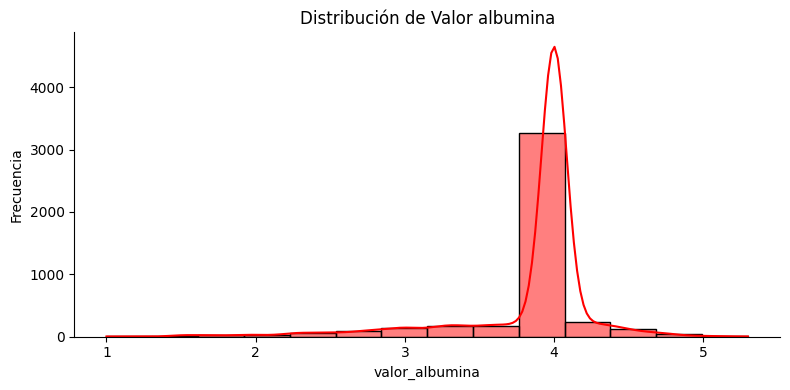

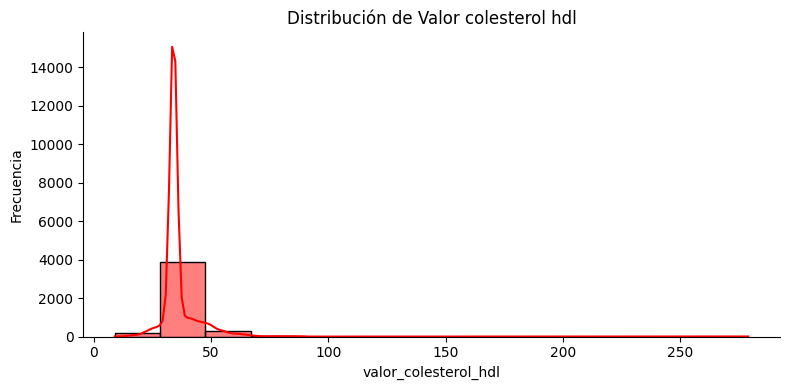

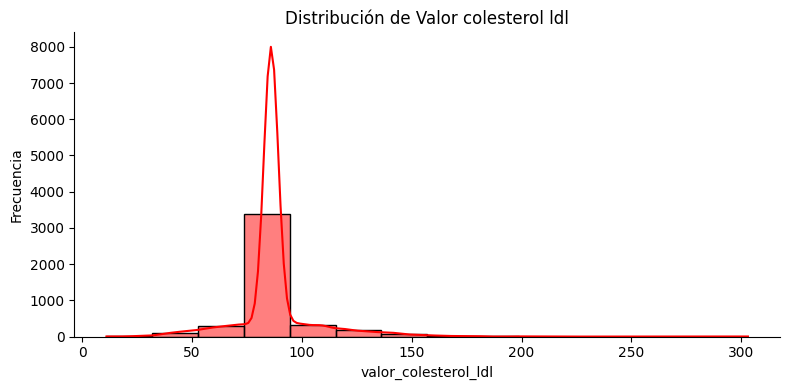

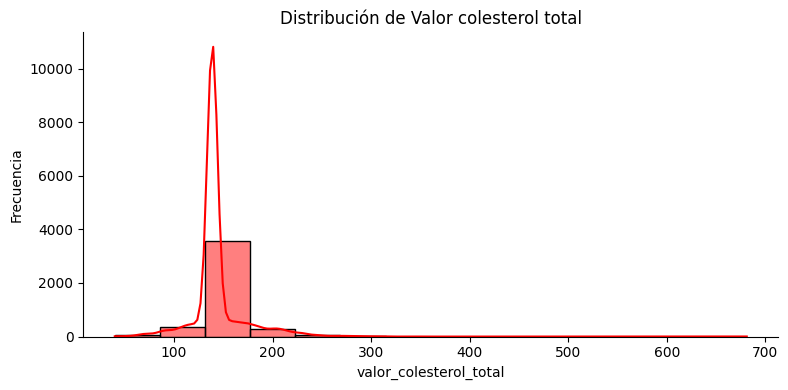

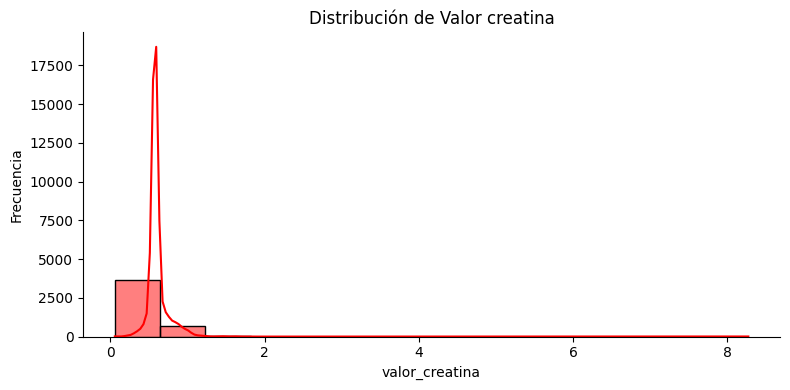

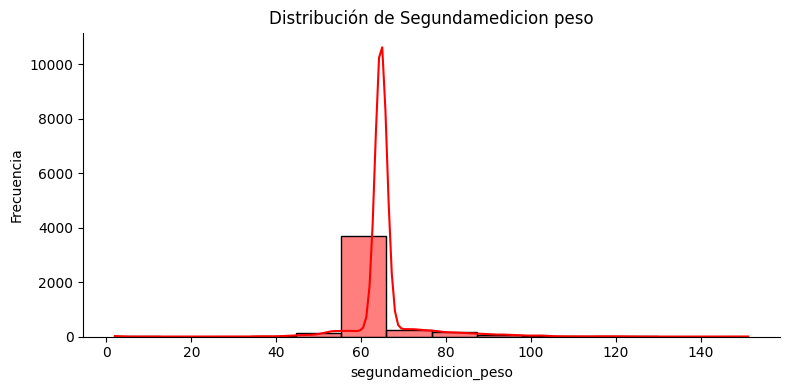

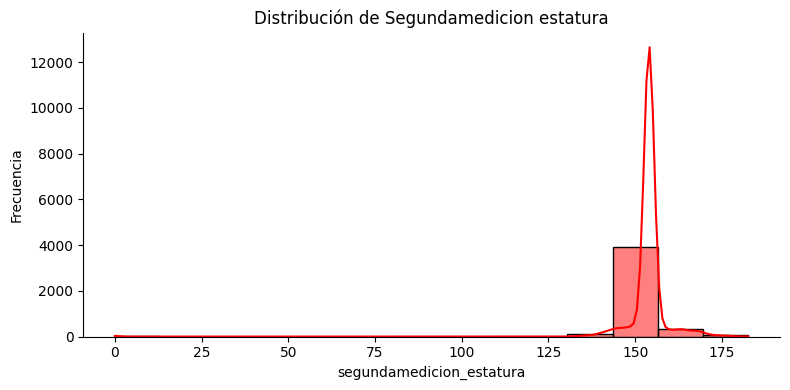

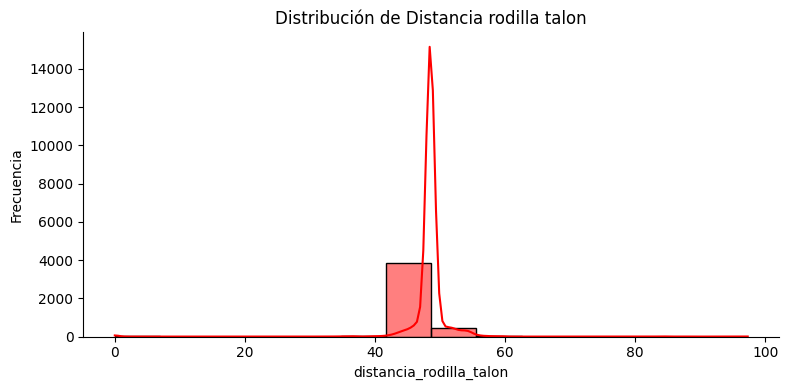

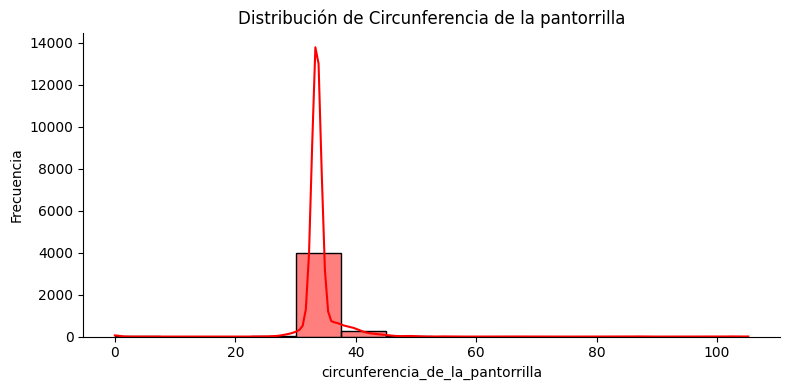

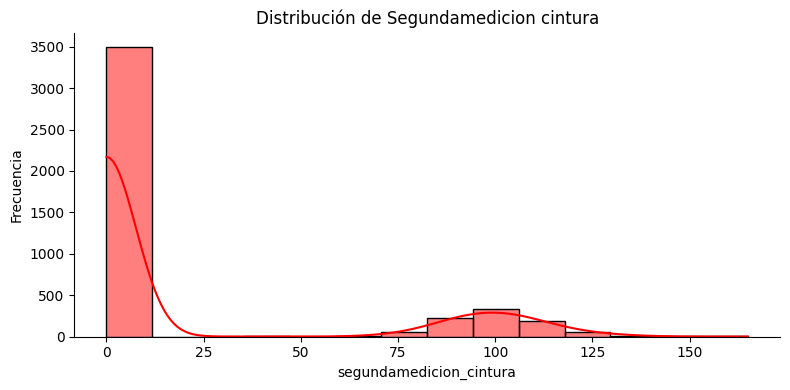

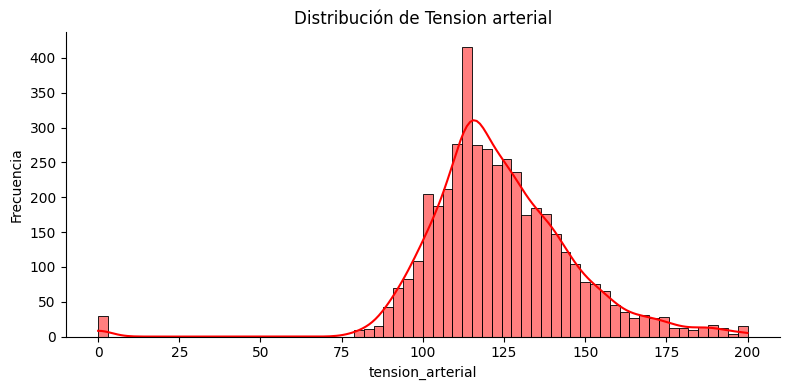

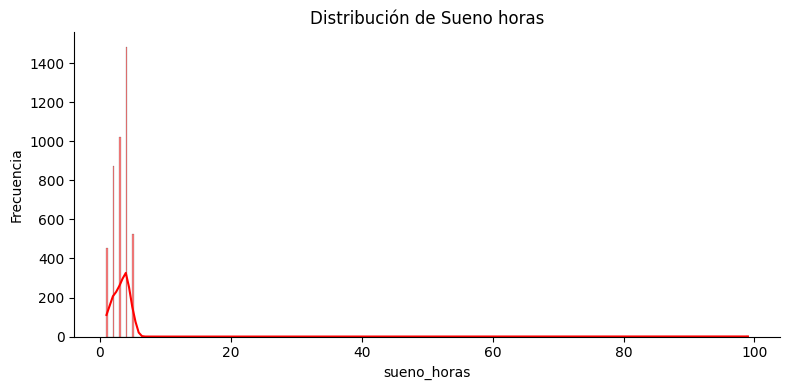

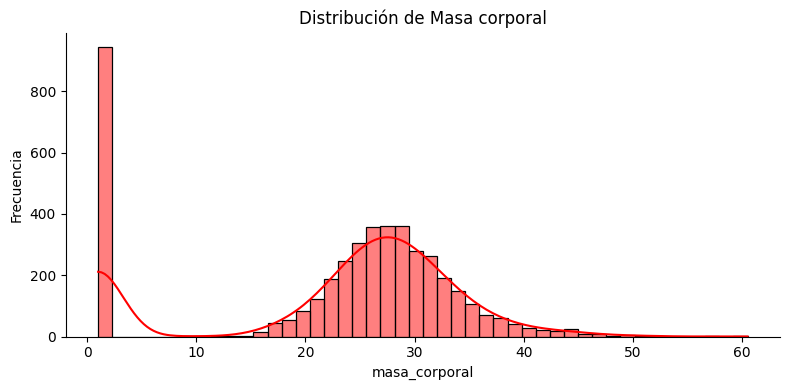

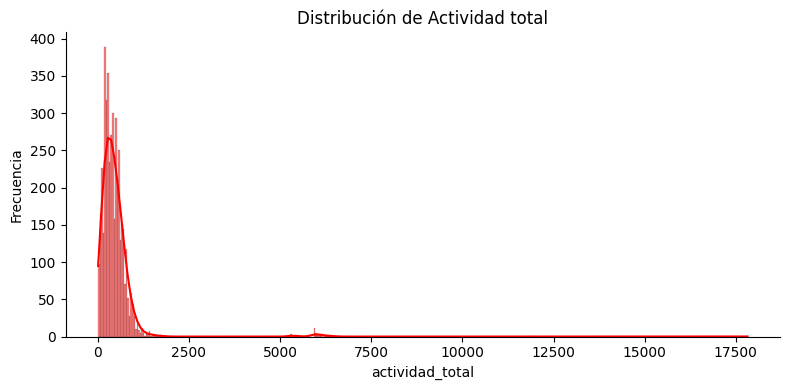

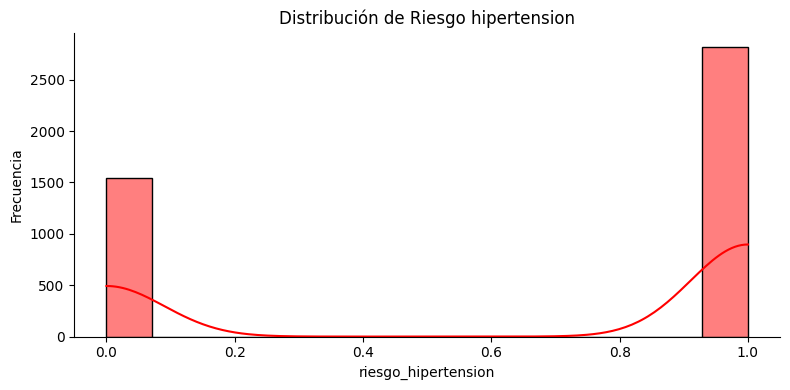

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
url = "https://raw.githubusercontent.com/Taneyquezada/Estadistica/refs/heads/main/Hipertension_Arterial_Mexico.csv"
df = pd.read_csv(url)

# Lista de variables a graficar
variables = [
    "sexo", "edad", "concentracion_hemoglobina", "temperatura_ambiente", "valor_acido_urico",
    "valor_albumina", "valor_colesterol_hdl", "valor_colesterol_ldl", "valor_colesterol_total",
    "valor_creatina", "segundamedicion_peso", "segundamedicion_estatura", "distancia_rodilla_talon",
    "circunferencia_de_la_pantorrilla", "segundamedicion_cintura", "tension_arterial", "sueno_horas",
    "masa_corporal", "actividad_total", "riesgo_hipertension"
]

# Crear un histograma con KDE para cada variable
for var in variables:
    plt.figure(figsize=(8, 4))
    try:
        sns.histplot(df[var], kde=True, color="red")
        plt.xlabel(var)
        plt.ylabel("Frecuencia")
        plt.title(f"Distribución de {var.replace('_', ' ').capitalize()}")
        plt.gca().spines["right"].set_visible(False)
        plt.gca().spines["top"].set_visible(False)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error al graficar {var}: {e}")


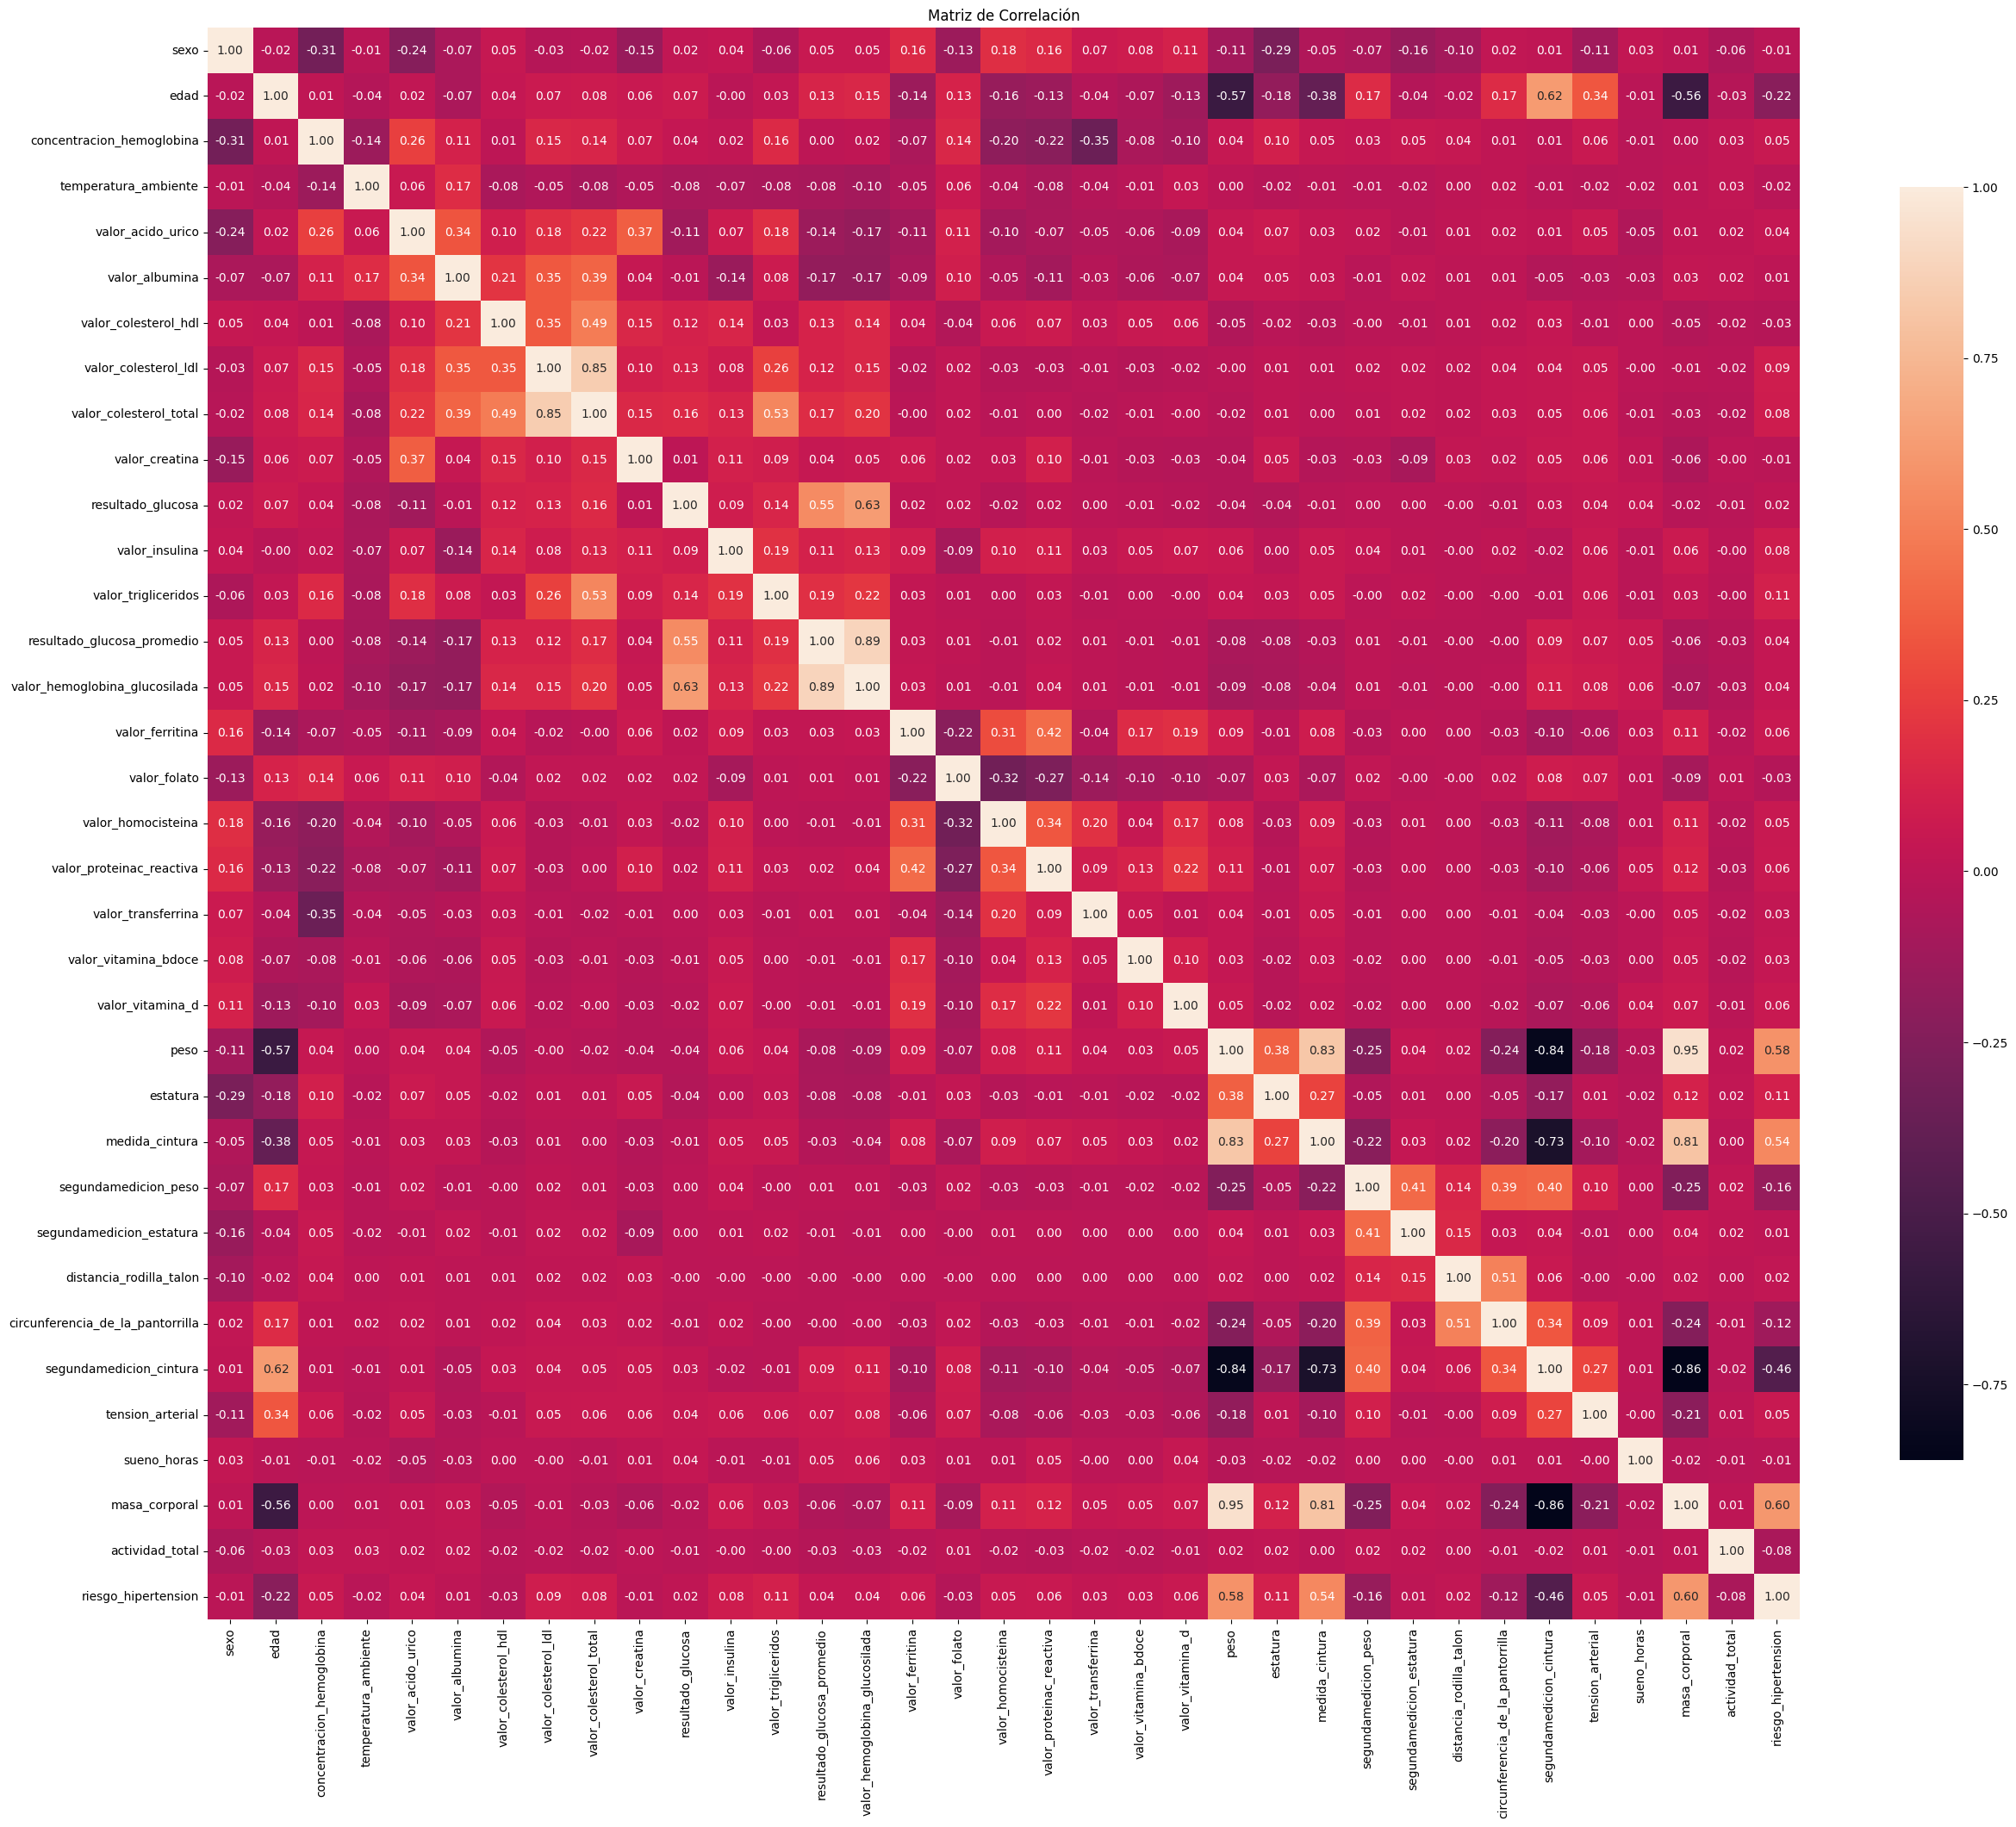

In [6]:
#b) Realiza un mapa de calor con la matriz de los coeficientes de correlación. Si la imagen no tiene un tamaño adecuado, cámbialo mediante la línea:
#plt.figure(figsize=(ancho, alto))
#cambia ancho y alto por valores numéricos. Esta línea ya se encuentra en el código que utilizas para realizar el mapa de calor.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
matriz_de_correlación = df.corr(numeric_only=True)

# Graficar el heatmap
plt.figure(figsize = (30,24))
sns.heatmap(matriz_de_correlación, annot = True, fmt = ".2f", square= True, cbar_kws = {'shrink': 0.8})
plt.title('Matriz de Correlación')
plt.show()

c) Tomando en cuenta el mapa de calor, propón una hipótesis que contemple al menos 3 variables independientes.

Variables independientes X = masa_corporal, peso, medida_cintura

Variable dependiente Y = riesgo_hipertension

Hipótesis

H0: No existe una relación significativa entre la masa corporal, peso y la medida de la cintura de una persona, y su riesgo de desarrollar hipertensión arterial.

H1:Existe al menos una relación significativa entre la masa corporal, peso o la medida de la cintura de una persona, y su riesgo de desarrollar hipertensión arterial.

Coeficiente de determinación:  0.3459




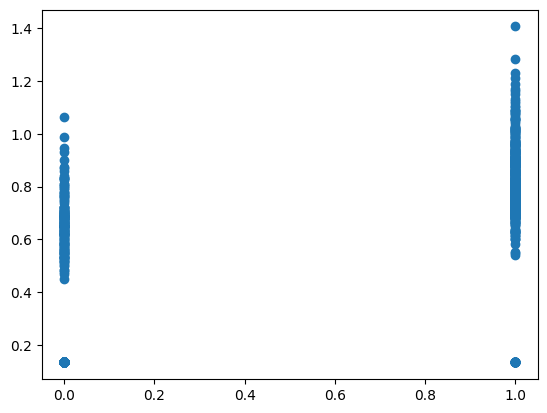

In [7]:
#d) Obtén y presenta la ecuación de regresión ajustada. Utiliza el modelo para comprobar su funcionamiento.

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm

X = df[['masa_corporal',"peso", "medida_cintura"]]
Y = df['riesgo_hipertension']

X_train, X_test,  Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_constante).fit()

Yc = modelo.predict(X_test_constante)

plt.scatter(Y_test,Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de determinación: {r2: 0.4f}')
print("\n")


In [11]:
b0,b1,b2,b3 = modelo.params
fun = lambda x1,x2, x3: b0 + b1 * x1 + b2 * x2 + b3 * x3
fun(26.265339, 61.05, 122.4)

0.7672001766834893

In [12]:
from statsmodels.formula.api import ols
modelo_2 = ols('riesgo_hipertension ~ masa_corporal+peso+medida_cintura', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_2, typ = 2)
tabla_anova

,sum_sq,df,F,PR(>F)
masa_corporal,17.930638,1.0,123.889479,2.142881e-28
peso,0.562149,1.0,3.884096,4.880866e-02
medida_cintura,5.098946,1.0,35.230524,3.156400e-09
Residual,630.882068,4359.0,NaN,NaN


In [18]:
#e) Calcula el coeficiente de determinación e interpreta este resultado.

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de determinación: {r2: 0.4f}')
print("\n")

print("Este coeficiente de determinación no es alto pero tampoco es malo,\ndonde son muchas las variables que pueden alterar el resultado\n")
print("También explica que hay un 34.59% que si explica que estas variables si tienen un impacto entre ellas")

Coeficiente de determinación:  0.3459


Este coeficiente de determinación no es alto pero tampoco es malo,
donde son muchas las variables que pueden alterar el resultado

También explica que hay un 34.59% que si explica que estas variables si tienen un impacto entre ellas


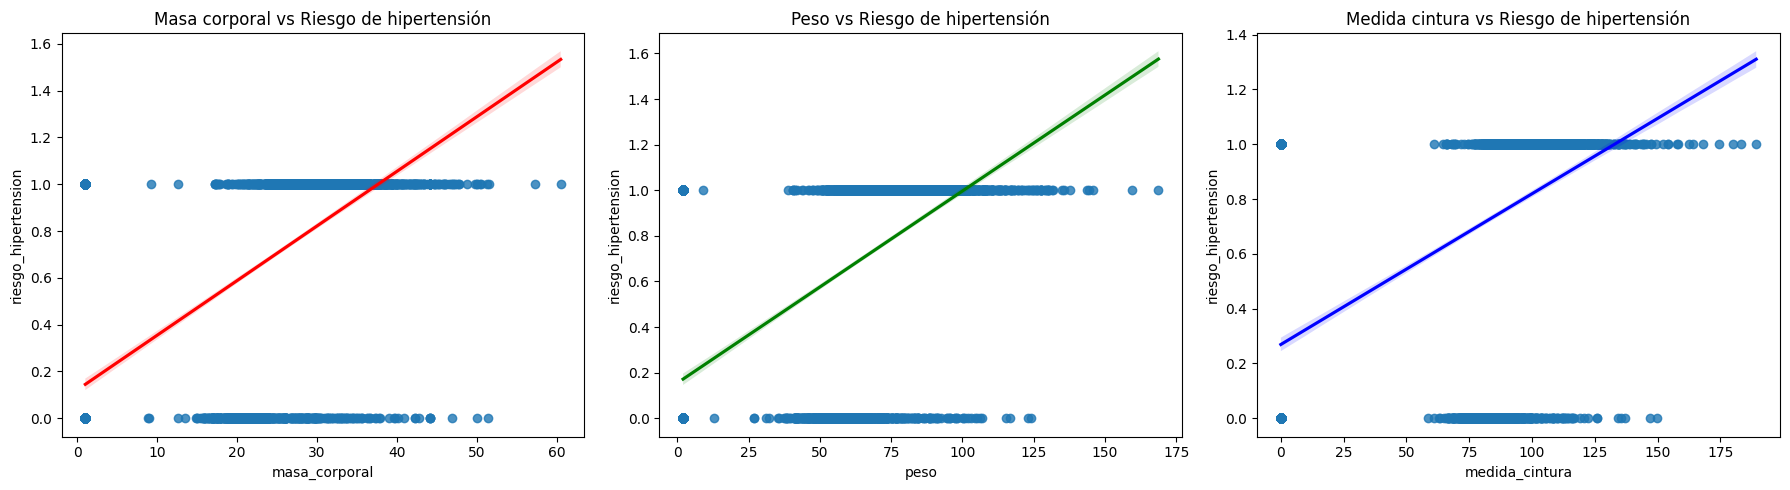

In [19]:
#f) Verifica los supuestos: linealidad, normalidad y homoscedasticidad

import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar el tamaño del gráfico
plt.figure(figsize=(18, 5))

# Variable 1: masa corporal
plt.subplot(1, 3, 1)
sns.regplot(x=df['masa_corporal'], y=df['riesgo_hipertension'], logistic=False, line_kws={'color': 'red'})
plt.title('Masa corporal vs Riesgo de hipertensión')

# Variable 2: peso
plt.subplot(1, 3, 2)
sns.regplot(x=df['peso'], y=df['riesgo_hipertension'], logistic=False, line_kws={'color': 'green'})
plt.title('Peso vs Riesgo de hipertensión')

# Variable 3: medida de cintura
plt.subplot(1, 3, 3)
sns.regplot(x=df['medida_cintura'], y=df['riesgo_hipertension'], logistic=False, line_kws={'color': 'blue'})
plt.title('Medida cintura vs Riesgo de hipertensión')

plt.tight_layout()
plt.show()

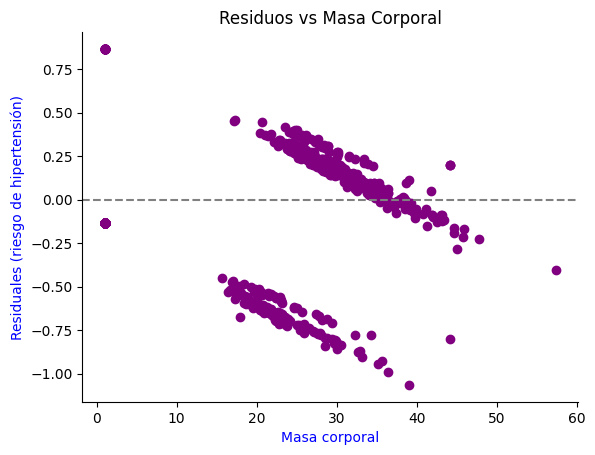

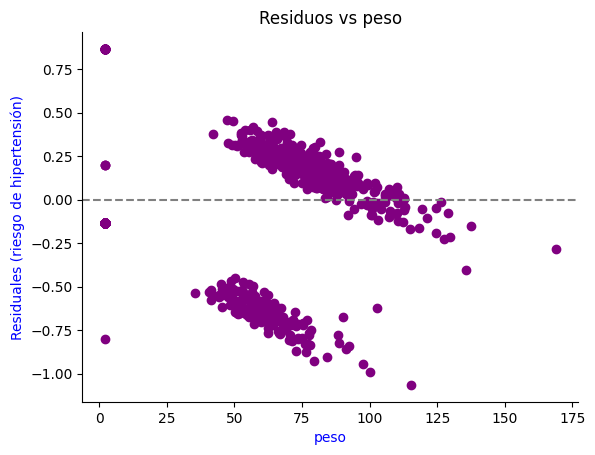

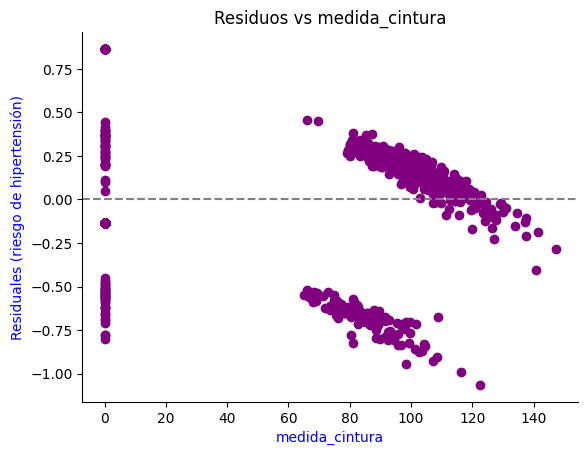

In [20]:
X = df["masa_corporal"]
plt.figure()
residuales = Y - Yc
plt.scatter(X, residuales, color='purple')
plt.xlabel('Masa corporal', color='blue')
plt.ylabel('Residuales (riesgo de hipertensión)', color='blue')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y=0, color='gray', linestyle='--')
plt.title("Residuos vs Masa Corporal")
plt.show()
print("\n")


X = df["peso"]
plt.figure()
residuales = Y - Yc
plt.scatter(X, residuales, color='purple')
plt.xlabel('peso', color='blue')
plt.ylabel('Residuales (riesgo de hipertensión)', color='blue')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y=0, color='gray', linestyle='--')
plt.title("Residuos vs peso")
plt.show()
print("\n")


X = df["medida_cintura"]
plt.figure()
residuales = Y - Yc
plt.scatter(X, residuales, color='purple')
plt.xlabel('medida_cintura', color='blue')
plt.ylabel('Residuales (riesgo de hipertensión)', color='blue')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y=0, color='gray', linestyle='--')
plt.title("Residuos vs medida_cintura")
plt.show()
print("\n")


Conclusión

En ninguna de las gráficas se verifica el supuesto de linealidad, ya que ninguna de las gráficas sigue la línea de regresión lineal.

Si siguen el supuesto de normalidad ya que los rsiduales no muestran datos atípicos.

Si cumplen con el supuesto de homoscedasticidad ya que nos datos muestran constancia en su varianza.

Dado que el modelo explica una parte significativa de la variabilidad en el riesgo de hipertensión, se rechaza la hipótesis nula (H₀) y se acepta la hipótesis alternativa (H₁).

El coeficiente de determinación de 0.3459 indica que aproximadamente el 34.6% de la variabilidad en el riesgo de hipertensión se explica por las variables masa corporal, peso y medida de cintura. Esto sugiere que sí existe una relación entre estas variables y el riesgo de hipertensión.